### MATH2504 S2, 2022, BigHW Submission 
### Submission form IV of IV 

Student #1 name: Limao Chang

Student #1 ID: 46978554

Student #2 name: Tiarne Graves

Student #2 ID: 46973081

GitHub repo: https://github.com/LimaoC/Limao-Chang__Tiarne-Graves-2504-2022-BigHW

---

**Note: It is expected that this notebook be runnable in the sense that the marker can select "Restart & Run All" and all code cells of solutions will execute. This requires not to have name clashes between solutions.**

---

# Solution to [Question 13](https://courses.smp.uq.edu.au/MATH2504/2022/assessment_html/bighw.html#q13)

13a:

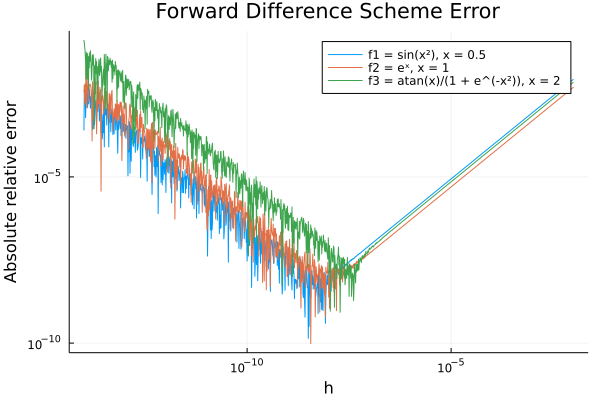

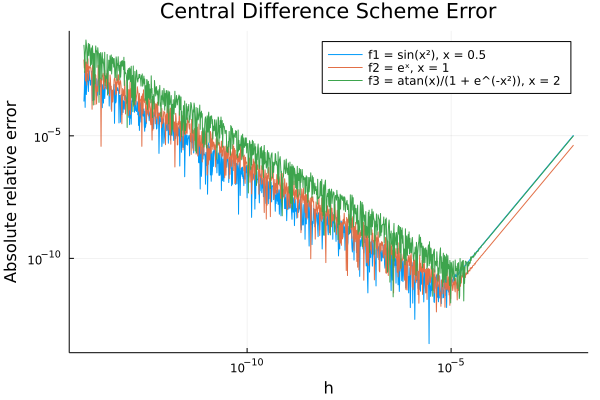

--- Forward Difference Scheme Error ---
Optimal h for f1 is ≈ 3.1622776601683795e-9 with absolute relative error ≈ 1.3869348351689363e-10.
Optimal h for f2 is ≈ 3.6307805477010177e-9 with absolute relative error ≈ 9.65236792496943e-11.
Optimal h for f3 is ≈ 1.9054607179632482e-8 with absolute relative error ≈ 8.436891159817205e-10.
--- Central Difference Scheme Error ---
Optimal h for f1 is ≈ 2.8840315031266055e-6 with absolute relative error ≈ 3.345866106434954e-14.
Optimal h for f2 is ≈ 4.365158322401657e-6 with absolute relative error ≈ 6.578961862390812e-13.
Optimal h for f3 is ≈ 9.772372209558111e-6 with absolute relative error ≈ 1.5281429107672176e-12.


In [33]:
using Calculus, Plots

"""
Returns the absolute relative error between the forward difference scheme
estimation of the function f and the analytic derivative f_der.
"""
function forward_diff_error(f::Function, f_der::Function, x::Number, h::Number)::Number
    forward_diff = (f(x + h) - f(x)) / h
    return abs(forward_diff - f_der(x)) / abs(f_der(x))
end

"""
Returns the absolute relative error between the central difference scheme
estimation of the function f and the analytic derivative f_der.
"""
function central_diff_error(f::Function, f_der::Function, x::Number, h::Number)::Number
    central_diff = (f(x + h/2) - f(x - h/2)) / h
    return abs(central_diff - f_der(x)) / abs(f_der(x))
end

# each function and their analytic derivatives
f1(x::Number) = sin(x^2)
f1_der(x::Number) = 2x*cos(x^2)
f2(x::Number) = MathConstants.e^x
f2_der(x::Number) = MathConstants.e^x
f3(x::Number) = atan(x)/(1 + MathConstants.e^(-x^2))
f3_der(x::Number) = 1/((1 + x^2)*(1 + MathConstants.e^(-x^2))) + (2x * MathConstants.e^(-x^2) * atan(x))/(1 + MathConstants.e^(-x^2))^2

# the x values at which the numerical derivatives are evaluated for each function
f1_x = 1/2
f2_x = 1
f3_x = 2

plot_labels = ["f1 = sin(x²), x = $f1_x" "f2 = eˣ, x = $f2_x" "f3 = atan(x)/(1 + e^(-x²)), x = $f3_x"]

h_range = 10 .^ (-14:0.01:-2)

forward_errors = [
    forward_diff_error.(f1, f1_der, f1_x, h_range),
    forward_diff_error.(f2, f2_der, f2_x, h_range),
    forward_diff_error.(f3, f3_der, f3_x, h_range),
]
central_errors = [
    central_diff_error.(f1, f1_der, f1_x, h_range),
    central_diff_error.(f2, f2_der, f2_x, h_range),
    central_diff_error.(f3, f3_der, f3_x, h_range),
]
display(plot(h_range,
        forward_errors,
        xaxis=:log,
        yaxis=:log,
        xlabel="h",
        ylabel="Absolute relative error",
        title="Forward Difference Scheme Error",
        labels=plot_labels
))
display(plot(
        h_range,
        central_errors,
        xaxis=:log,
        yaxis=:log,
        xlabel="h",
        ylabel="Absolute relative error",
        title="Central Difference Scheme Error",
        labels=plot_labels
))

println("--- Forward Difference Scheme Error ---")
for i in 1:3
    (optimal_h_error, optimal_h_index) = findmin(forward_errors[i])
    optimal_h = h_range[optimal_h_index]
    println("Optimal h for f$i is ≈ $optimal_h with absolute " *
            "relative error ≈ $optimal_h_error.")
end
println("--- Central Difference Scheme Error ---")
for i in 1:3
    (optimal_h_error, optimal_h_index) = findmin(central_errors[i])
    optimal_h = h_range[optimal_h_index]
    println("Optimal h for f$i is ≈ $optimal_h with absolute " *
            "relative error ≈ $optimal_h_error.")
end

13b:

13c:

In [ ]:
K_vals = [10, 20, 100]
softmax(z::Vector{Real})::Vector{Real} = exp.(z) / sum(exp.(z))

function softmax_jacobian(z::Vector{Real})
    K = length(z)  # dimension of z
    jacobian = Array{Int}(undef, (K, K))
    S = softmax(z)
    
    for i in 1:K
        for j in 1:K
            if i == j
                jacobian[i][j] = S[i] * (1 - S[i])
            else
                jacobian[i][j] = -S[i] * S[j]
            end
        end
    end
    return jacobian
end

# Solution to [Question 14](https://courses.smp.uq.edu.au/MATH2504/2022/assessment_html/bighw.html#q14)

# Solution to [Question 15](https://courses.smp.uq.edu.au/MATH2504/2022/assessment_html/bighw.html#q15)

#### 15a:

In [ ]:

using Plots, Measures

#These four convenience functions extract the state variable from the state vector
#It is assumed the layout of the vector u is u = [v_x, v_y, x, y]
state_v_x(u::Vector{Float64}) = u[1]
state_v_y(u::Vector{Float64}) = u[2]
state_x(u::Vector{Float64}) = u[3]
state_y(u::Vector{Float64}) = u[4]

"""
Computes the RHS for the one body problem. 
"""
function df_dt_one_body(u::Vector{Float64}, t::Float64)::Vector{Float64}
    M, G = 1, 1 #We take these constants as normalized. Naturally they would need to be set for physical values.
    r = sqrt(state_x(u)^2 + state_y(u)^2)
    return [-M*G*state_x(u)/r^3, -M*G*state_y(u)/r^3, state_v_x(u), state_v_y(u)]
end;

function plot_solution_position( t::AbstractArray{T}, 
                        u::Vector{Vector{Float64}}; 
                        title::String = "",
                        label::Union{String, Bool} = false) where T
    x, y, v_x, v_y = state_x.(u), state_y.(u), state_v_x.(u), state_v_y.(u)
 
    #"Energy"
    r = @. sqrt(x^2 + y^2)
    E = @. 0.5*(v_x^2 + v_y^2) - 1.0/r

    p1 = plot(  x, y, label = label, xlabel= "X", ylabel = "Y",
                title = title*" (position)", aspectratio=1,legend=:topleft,ylim=(-7,7))
    scatter!([0], [0], ms=15, msw=0, c=:orange, shape =:star, label="Sun")
    scatter!([x[1]], [y[1]], ms=5, msw=0, c=:blue, shape =:circle, label="Earth initial position")

    
    plot(p1, margin = 10mm,size=(800,400))
end;


function plot_solution_energy( t::AbstractArray{T}, 
                        u::Vector{Vector{Float64}}; 
                        title::String = "",
                        label::Union{String, Bool} = false) where T
    x, y, v_x, v_y = state_x.(u), state_y.(u), state_v_x.(u), state_v_y.(u)
 
    #"Energy"
    r = @. sqrt(x^2 + y^2)
    E = @. 0.5*(v_x^2 + v_y^2) - 1.0/r

    p4 = plot(  t, E, xlabel = "Time", ylabel = "Energy",
                label = label, title = title*" (energy)")
    plot(p4, margin = 10mm,size=(800,400))
end;

: 

In [ ]:
#eulers methods
function eulers_method(h, u, x)   
    t = 0.0
    i = 1
    a = Int64(200/h) #number of steps
    t_array = Array{Float64}(undef, a)
    u_array = Array{Vector{Float64}}(undef, a)
    while i <=a
        u = u + h * df_dt_one_body(u, t)
        t = t + h
        u_array[i] = u
        t_array[i] = t
        i = i + 1
    end
return x(t_array, u_array, title = "Euler's method", label = "h=$h")
end


#eulers methods for too many values
function eulers_method_2(h_1, u, x)   
    t = 0.0
    i = 1
    h = 2*h_1
    a = Int64(200/h) #number of steps
    t_array = Array{Float64}(undef, a)
    u_array = Array{Vector{Float64}}(undef, a)
    while i <=a
        u = u + h * df_dt_one_body(u, t)
        t = t + h
        u_array[i] = u
        t_array[i] = t
        i = i + 1
    end
return x(t_array, u_array, title = "Euler's method", label = "h=$h_1")
end
p1 = eulers_method(0.01, [0.0, 1.0, 1.5, 0],plot_solution_position)
p2 = eulers_method(0.001, [.0, 1.0, 1.5, 0],plot_solution_position)
p3 = eulers_method_2(0.0001, [0.0, 1.0, 1.5, 0],plot_solution_position)

plot(p1,p2)


In [ ]:
plot(p3)

In [ ]:
p4 = eulers_method(0.01, [0.0, 1.0, 1.5, 0],plot_solution_energy)
p5 = eulers_method(0.001, [.0, 1.0, 1.5, 0],plot_solution_energy)
p6 = eulers_method_2(0.0001, [0.0, 1.0, 1.5, 0],plot_solution_energy)
p7 = plot!(p4, p5[1][1][:x], p5[1][1][:y])
plot!(p7, p6[1][1][:x], p6[1][1][:y])

#### 15b:

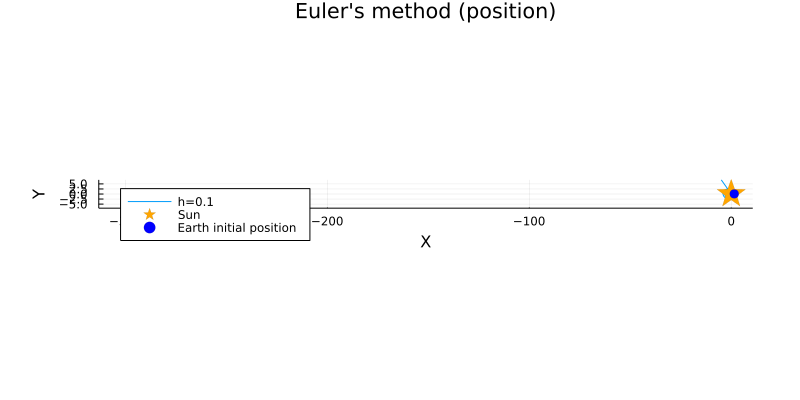

In [3]:
function RK4(h, u, x)
    t = 0.0
    i = 1
    steps = Int64(200/h) #number of steps
    t_array = Array{Float64}(undef, steps)
    u_array = Array{Vector{Float64}}(undef, steps)
    while i <=steps
        k_1 = df_dt_one_body(u, t)
        k_2 = df_dt_one_body(u + h*(k_1/2), t)
        k_3 = df_dt_one_body(u + h*(k_2/2), t)
        k_4 = df_dt_one_body(u + (h*k_3), t)
        u = u + (h/6)*(k_1 + 2*k_2 + 2*k_3 + k_4)
        t = t + h
        u_array[i] = u
        t_array[i] = t
        i = i + 1
    end
return x(t_array, u_array, title = "RK4 method", label = "h=$h") 
end

p1 = RK4(0.01, [0.0, 1.0, 1.5, 0.0], plot_solution_position)
p2 = RK4(0.1, [0.0, 1.0, 1.5, 0.0], plot_solution_position)
p3 = RK4(0.5, [0.0, 1.0, 1.5, 0.0], plot_solution_position)

plot(p1,p2) 


In [ ]:
plot(p3)

In [ ]:
p4 = RK4(0.01, [0.0, 1.0, 1.5, 0],plot_solution_energy)
p5 = RK4(0.1, [.0, 1.0, 1.5, 0],plot_solution_energy)
p6 = RK4(0.5, [0.0, 1.0, 1.5, 0],plot_solution_energy)
p7 = plot!(p4, p5[1][1][:x], p5[1][1][:y])
plot!(p7, p6[1][1][:x], p6[1][1][:y])

#### 15c:

The RK4 method is better at predicting trajectory than Euler's method even with a bigger h value, this can be seen as the position plot for 0.01 is more precise in the RK4 method than Eulers method. The RK4 method is however less efficent as it calls the function df_dt_one_body 4 to complete its calculations for each t value, where as Euler's only calls df_ft_one_body, once per t value.

#### 15d:

# Solution to [Question 16](https://courses.smp.uq.edu.au/MATH2504/2022/assessment_html/bighw.html#q16)

#### 16a:

In [ ]:
function second_order_leapfrog(h, u, x)
    t = 0.0
    i = 1
    v = [0.0, 0.0, 0.0, 0.0]
    steps = Int64(200/h) #number of steps
    t_array = Array{Float64}(undef, steps)
    u_array = Array{Vector{Float64}}(undef, steps)
    while i <=steps     
        u = u + h *(v + (h/2)* df_dt_one_body(u, t))
        v = v + (h/2)* df_dt_one_body(u, t) + (h/2)* df_dt_one_body(u, t)
        t = t + h
        u_array[i] = u
        t_array[i] = t
        i = i + 1
    end
return x(t_array, u_array, title = "Leapfrog method", label = "h=$h")
return 
end


#second_order_leapfrog(0.01, [0.0, 1.0, 1.5, 0.0], plot_solution_position) #plotting being weird for these guys
#second_order_leapfrog(0.1, [0.0, 1.0, 1.5, 0.0], plot_solution_position)
#second_order_leapfrog(0.5, [0.0, 1.0, 1.5, 0.0], plot_solution_position)

#second_order_leapfrog(0.01, [0.0, 1.0, 1.5, 0.0], plot_solution_energy) #can't get them on the same plot
#second_order_leapfrog(0.1, [0.0, 1.0, 1.5, 0.0], plot_solution_energy)
#second_order_leapfrog(0.5, [0.0, 1.0, 1.5, 0.0], plot_solution_energy)

#### 16b:

#### 16c:

#### 16d:

# Solution to [Question 17](https://courses.smp.uq.edu.au/MATH2504/2022/assessment_html/bighw.html#q17)

Dr. Amy Chan finished her undergraduate degree in 2009 on real analysis and image analysis, and her honours in 2010 on real analysis and topology optimisation. She completed her PhD with CSIRO & UQ in image analysis and statistics in 2018 where she conducted image segmentation of brain MRIs using mixture models & parameter estimation. Statistics was a new interest for Amy when she started her PhD, but after obtaining it, she started working as a statistician at Polymathian. Over the years, her role at Polymathian varied and she has taken on the roles of a software developer/consultant, and now a manager who works in all three roles.

Polymathian utilises mathematics and software to solve complex business problems in many industries including mining, rail, and energy. Amy discussed many of the relevant tools and programming languages she has used in industry, including Git, WSL/Unix, Docker, Python, React/JS, and more. It was interesting to see that I had come across many of the tools that she has used in industry, both in the university courses I've taken (MATH2504 and various computer science courses) and also in my personal projects.

Amy gave some valuable advice throughout her seminar. One piece of advice that stood out to me was about presenting statistics and results to clients. Amy had to manage different language barriers between colleagues and clients, and stated the importance of, at times, forging mathematical explanations in favour of more accessible ones - being able to communicate an idea or concept to someone else effectively, regardless of their experience or knowledge in the field, was more important.